# Caso Práctico Final: Predicción de Fraude

El conjunto de datos para este caso práctico trata sobre fraude de cuentas bancarias (BAF) y se publicó en NeurIPS 2022. Comprende un total de 6 conjuntos de datos tabulares sintéticos diferentes sobre fraude de cuentas bancarias. 

El enlace a la publicación puedes encontrarlo aquí:
[Enlace publicación](https://arxiv.org/pdf/2211.13358.pdf)

Para este caso práctico trabajaremos con el dataset preprocesado en el caso final de la asignatura Data Science: Análisis Exploratorio de Datos. Siempre es necesario preprocesar los datos para adaptarlos para que funcionen como entrada de un modelo de Machine Learning, de modo que aprovecharemos esta parte del trabajo ya hecha.


In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

# Lectura de datos

Utiliza los datos que preocesaste en el caso final de la asignatura de Análisis Exploratorio de Datos, ya que en dicho caso práctico los datos obtenidos serían los necesarios para introducir a un modelo de machine learning.

In [16]:
#Lectura de datos
df = pd.read_csv("datos_pca.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,fraud_bool
0,2.976401,3.362779,1.336025,0.142681,0.644478,0
1,0.968383,2.063848,0.750672,-0.013677,-1.652872,0
2,0.839162,0.148954,0.383372,2.088815,0.392829,0
3,3.088676,0.470184,-0.506475,0.375440,-0.595905,0
4,1.085251,0.299001,-0.195134,1.977680,-0.000466,0


### Análisis de la variable objetivo

Plotea un diagrama de barras de la variable objetivo y obten el porcentaje de ceros y unos ¿Qué observas?


Porcentajes:
fraud_bool
0    98.896677
1     1.103323
Name: count, dtype: float64


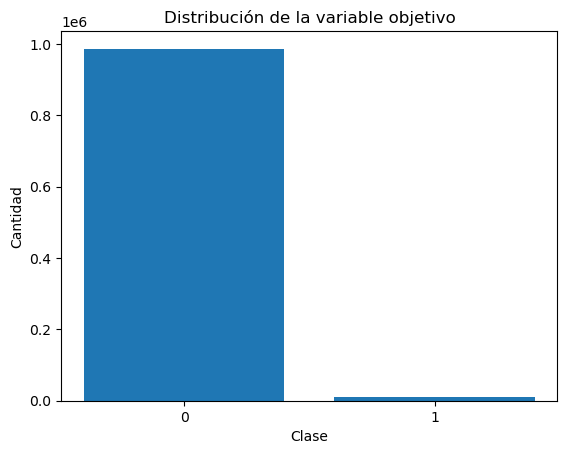

In [30]:
# Contamos cuántos 0 y 1 hay en el target
conteo = df['fraud_bool'].value_counts()

# Calculamos los porcentajes
porcentajes = conteo / len(df) * 100
print("\nPorcentajes:")
print(porcentajes)

# Mostramos un gráfico de barras
plt.bar(conteo.index, conteo.values)
plt.xticks([0, 1])
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.title("Distribución de la variable objetivo")
plt.show()

# Clasificación

## Técnicas de balanceo

Hay diferentes técnicas que nos permiten lidiar con el desbalanceo de la variable objetivo. Aquí se describen algunas de ellas:

1. Remuestreo de datos:
    * Sobremuestreo (Oversampling): Aumenta el número de instancias de la clase minoritaria.
    * Submuestreo (Undersampling): Reduce el número de instancias de la clase mayoritaria.
    * Remuestreo combinado: Combina técnicas de sobremuestreo y submuestreo para equilibrar las clases.
2. Generación de muestras sintéticas:
    * SMOTE (Synthetic Minority Over-sampling Technique): Genera nuevas instancias sintéticas de la clase minoritaria mediante interpolación entre instancias similares.
3. Ponderación de clases:
    * Ajusta los pesos de las clases durante el entrenamiento para dar más importancia a la clase minoritaria.

A continuación genera diferentes datasets aplicando las diferentes técnicas e implementa un modelo de clasificación con cada uno de ellos y analiza las diferencias.


In [31]:
#En primer lugar divide los datos en conjunto de entrenamiento y train.

# Separamos las características (X) y la variable objetivo (y)
X = df.drop('fraud_bool', axis=1)  
y = df['fraud_bool']

# Dividimos los datos en conjunto de entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostramos las dimensiones de cada conjunto
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de test:", X_test.shape)

Tamaño del conjunto de entrenamiento: (798388, 5)
Tamaño del conjunto de test: (199597, 5)


Las técnicas de balanceo se aplicarán sobre los conjuntos de entrenamiento. El conjunto de test debe de ser el inicial, que sea un conjunto que el modelo no haya visto ni haya sido modificado.

### Oversampling: 
Implica duplicar instancias aleatorias de la clase minoritaria hasta que se equilibre con la clase mayoritaria.
El código para realizar esta ténica se proporciona.

In [32]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

### Undersampling: 
Implica eliminar instancias aleatorias de la clase mayoriataria hasta que se equilibre con la clase mayoritaria.
El código para realizar esta ténica se proporciona.

In [33]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

### SMOTE: 
SMOTE genera instancias sintéticas de la clase minoritaria basándose en los datos existentes, lo que reduce el riesgo de sobreajuste.
El código para realizar esta ténica se proporciona.

In [34]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Modelado

Para este caso práctico aplicara el algoritmo Random Forest para calcular las predicciones. Aplica este modelo utilizando cada uno de los conjuntos de datos generados anteriormente y obtén las métricas para evaluar el rendimienot del modelo. ¿Qué técnica ha funcionado mejor? 
¿Por qué?

Si no recuerdas como realizar un modelo de clasificación y su evaluación, puedes repasar lo visto en el caso práctico de la Unidad 1.

*Idea*:En el caso que creas necesario obtén las métricas de predicción sobre el conjunto de entrenamiento para analizar si hay overfitting.

#### Respuesta:

Después de comparar los tres, creo que la técnica que funcionó mejor fue Oversampling, porque logró el mejor equilibrio entre detectar fraudes (recall alto) y tener un f1-score mayor para la clase 1, comparado con las otras técnicas.

También pensé en revisar las métricas sobre el conjunto de entrenamiento para ver si había overfitting, pero como los resultados en el test ya mostraron diferencias claras entre las técnicas, me centré en eso.

In [ ]:
# Función para entrenar y evaluar el modelo
def entrenar_y_evaluar(X_entrenamiento, y_entrenamiento, nombre_tecnica):
    print(f"\nResultados para: {nombre_tecnica}")

    # Random Forest con menos árboles, limitando la profundidad de los árboles y utilizar todos los núcleos del procesador (más rápido)
    modelo = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)

    # Entrenar el modelo con los datos balanceados
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones sobre el conjunto de test
    y_pred = modelo.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

entrenar_y_evaluar(X_over, y_over, "Oversampling")
entrenar_y_evaluar(X_under, y_under, "Undersampling")
entrenar_y_evaluar(X_resampled, y_resampled, "SMOTE")


Resultados para: Oversampling
              precision    recall  f1-score   support

           0     0.9938    0.7846    0.8769    197395
           1     0.0281    0.5577    0.0534      2202

    accuracy                         0.7821    199597
   macro avg     0.5109    0.6711    0.4652    199597
weighted avg     0.9831    0.7821    0.8678    199597


Resultados para: Undersampling
              precision    recall  f1-score   support

           0     0.9943    0.7155    0.8321    197395
           1     0.0243    0.6340    0.0467      2202

    accuracy                         0.7146    199597
   macro avg     0.5093    0.6747    0.4394    199597
weighted avg     0.9836    0.7146    0.8235    199597


Resultados para: SMOTE
              precision    recall  f1-score   support

           0     0.9938    0.7645    0.8641    197395
           1     0.0262    0.5690    0.0502      2202

    accuracy                         0.7623    199597
   macro avg     0.5100    0.6667    0.45

### Dataset original: 
Ejecuta el modelo y analiza sus métricas con el dataset original desbalanceado. ¿Qué observas? ¿Qué conclusiones puedes extraer?

#### Respuesta:

El modelo tuvo un accuracy muy alto porque la mayoría de los datos son de la clase 0. Para la clase 1 (fraude), el recall y el f1-score eran casi nulo. Eso significa que el modelo prácticamente no detectó fraudes. Aunque el modelo parece funcionar bien por el accuracy, no es útil para detectar fraudes, que es lo más importante.

In [ ]:
# Entrenamos y evaluamos el modelo con los datos originales (sin balancear)
def entrenar_y_evaluar_dataset_original(X_entrenamiento, y_entrenamiento):
    print("\nDataset original (sin balancear)")

    # Random Forest con menos árboles, limitando la profundidad de los árboles y utilizar todos los núcleos del procesador (más rápido)
    modelo = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)

    # Entrenar el modelo con los datos originales
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Predecir sobre el conjunto de test
    y_pred = modelo.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

entrenar_y_evaluar_dataset_original(X_train, y_train)


Resultados para: Dataset original (sin balancear)
              precision    recall  f1-score   support

           0     0.9890    1.0000    0.9945    197395
           1     0.5000    0.0005    0.0009      2202

    accuracy                         0.9890    199597
   macro avg     0.7445    0.5002    0.4977    199597
weighted avg     0.9836    0.9890    0.9835    199597



### Oversampling dataset
Entrena el modelo con el dataset sobre el que aplicaste la técnica de oversampling y analiza sus métricas. ¿Qué observas? ¿Qué conclusiones puedes extraer?

#### Respuesta:

El accuracy bajó un poco comparado con el dataset original. El recall de fraudes subió mucho. Eso significa que el modelo logró encontrar más de la mitad de los fraudes, lo cual es muy importante. Sin embargo, la precisión fue baja, lo que indica que el modelo también se confundió y clasificó muchas transacciones normales como fraudes. El f1-score de la clase 1 fue mejor que en el dataset original, pero sigue siendo bajo. Conclusión, el oversampling ayudó al modelo a detectar muchos más fraudes, pero sacrificó precisión. Es posible que tengamos algunos falsos positivos.

In [66]:
def entrenar_y_evaluar_oversampling(X_entrenamiento, y_entrenamiento):
    print("\nOversampling")

    # Crear el modelo con menos árboles, profundidad limitada y todos los núcleos del procesador
    modelo = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)

    # Entrenar el modelo con los datos balanceados (oversampling)
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Predecir sobre el conjunto de test (sin modificar)
    y_pred = modelo.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

entrenar_y_evaluar_oversampling(X_over, y_over)


Oversampling
              precision    recall  f1-score   support

           0     0.9938    0.7846    0.8769    197395
           1     0.0281    0.5577    0.0534      2202

    accuracy                         0.7821    199597
   macro avg     0.5109    0.6711    0.4652    199597
weighted avg     0.9831    0.7821    0.8678    199597



### Undersampling dataset
Entrena el modelo con el dataset sobre el que aplicaste la técnica de undersampling y analiza sus métricas. ¿Qué observas? ¿Qué conclusiones puedes extraer?

#### Respuesta:

El modelo logró detectar muchos fraudes, recall bueno. Pero con una precisión muy baja, o sea, muchas de sus predicciones de fraude eran incorrectas. El f1-score para la clase 1 fue muy bajo. También bajó el accuracy. El undersampling mejoró bastante la detección de fraudes, pero a cambio sacrificó la precisión y el rendimiento general del modelo. Es posible que tenga muchos falsos positivos también.

In [69]:
def entrenar_y_evaluar_undersampling(X_entrenamiento, y_entrenamiento):
    print("\nUndersampling")

    # Crear el modelo con menos árboles, profundidad limitada y todos los núcleos del procesador
    modelo = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)

    # Entrenar el modelo con los datos balanceados (undersampling)
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Predecir sobre el conjunto de test (sin modificar)
    y_pred = modelo.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

entrenar_y_evaluar_undersampling(X_under, y_under)


Undersampling
              precision    recall  f1-score   support

           0     0.9943    0.7155    0.8321    197395
           1     0.0243    0.6340    0.0467      2202

    accuracy                         0.7146    199597
   macro avg     0.5093    0.6747    0.4394    199597
weighted avg     0.9836    0.7146    0.8235    199597



### SMOTE dataset
Entrena el modelo con el dataset sobre el que aplicaste la técnica de SMOTE y analiza sus métricas. ¿Qué observas? ¿Qué conclusiones puedes extraer?

#### Respuesta:

El modelo tuvo un accuracy general parecido al modelo con oversampling. El recall de la clase 1 muestra que detectó más de la mitad de los fraudes. Sin embargo, la precisión para la clase 1 fue baja. El f1-score de la clase 1 fue un poco menor que el del modelo con oversampling. El modelo con SMOTE mejoró la detección de fraudes en comparación con el dataset original, y tuvo un rendimiento similar al de oversampling. Aunque la precisión fue baja, el modelo fue capaz de identificar muchos fraudes, lo cual puede ser útil si queremos priorizar la detección y prevenir pérdidas.

In [71]:
def entrenar_y_evaluar_smote(X_entrenamiento, y_entrenamiento):
    print("\nSMOTE")

    # Crear el modelo con menos árboles, profundidad limitada y todos los núcleos del procesador
    modelo = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)

    # Entrenar el modelo con los datos balanceados (SMOTE)
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Predecirs sobre el conjunto de test (sin modificar)
    y_pred = modelo.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))

entrenar_y_evaluar_smote(X_resampled, y_resampled)


SMOTE
              precision    recall  f1-score   support

           0     0.9938    0.7645    0.8641    197395
           1     0.0262    0.5690    0.0502      2202

    accuracy                         0.7623    199597
   macro avg     0.5100    0.6667    0.4572    199597
weighted avg     0.9831    0.7623    0.8552    199597



#### Conclusiones

¿Qué conclusiones sacas tras aplicar el modelo utilizando las diferentes técnicas?

Después de aplicar el modelo Random Forest con las diferentes técnicas de balanceo (oversampling, undersampling y SMOTE), observé que todas mejoraron bastante la detección de fraudes en comparación con el dataset original desbalanceado.

- El dataset original tuvo un accuracy alto, pero casi no detectó fraudes.
- El undersampling logró el mayor recall para la clase de fraude, pero con una precisión muy baja, lo que generó muchos falsos positivos.
- El oversampling y SMOTE dieron resultados similares, con un buen equilibrio entre recall y accuracy general, aunque la precisión para la clase 1 siguió siendo baja.

En general, puedo concluir que usar técnicas de balanceo es fundamental para este tipo de problemas, y que oversampling y SMOTE fueron las técnicas más balanceadas.

# Clustering

En esta sección queremos segmentar los tipos de transacciones fraudulentas y no fraudulentas para analizar si hay tipos de transacciones con patrones comunes.
Para ello aplica un algoritmo de clustering. Tal y como aprendimos en la Unidad 2, utilizaremos k-Means.

Elimina la variable objetivo para la segmentación.

In [73]:
df_sin_target = df.drop("fraud_bool", axis=1)

# Normalizamos los datos para aplicar k-means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sin_target)

#### Dataset original

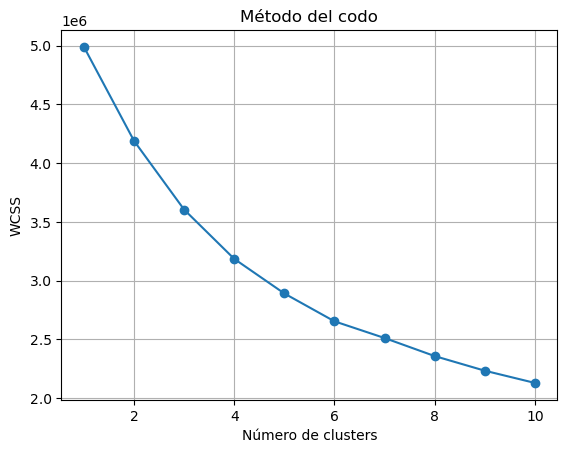

In [74]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

Aplica el método del codo para obtener el número óptimo de clusters previamente

Aplica el algoritmo k_means. Para cada conjunto de datos printea el número de registros que pertenen a dicho cluster y estadísticos de cada variable numérica. Para las variables binarias puedes graficar la cantidad de 0s y 1s por cluster.
¿Qué observas? ¿Tienen los clusters un tamaño similar? 

*Idea*: Puedes guardar la media por ejemplo de cada variable por cluster en un dataframe, de forma que tengas todos los valores agrupados y se más fácil de comparar.

In [75]:
# Aplicar k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Añadimos los clusters
df["cluster"] = clusters

print(df["cluster"].value_counts())

# Calculamos estadísticas por cluster
estadisticas = df.groupby("cluster").mean()
print(estadisticas)


cluster
0    281186
3    274760
1    256553
2    185486
Name: count, dtype: int64
              PC1       PC2       PC3       PC4       PC5  fraud_bool
cluster                                                              
0       -0.298152 -0.477392 -1.004770 -0.078849 -0.453915    0.012789
1        0.119539 -0.144551  0.330833  1.114936 -0.088479    0.006599
2       -0.718228  1.967413  0.346937 -0.448575 -0.145100    0.023468
3        0.678371 -0.704640  0.485147 -0.657536  0.645102    0.004983


#### Respuesta:

El orden descendente de clusters es: 0,3,1,2. Los tamaños son parecidos, pero no hay un desequilibrio extremo entre ellos, lo que está bien para el análisis. La columna fraud_bool es más alta en el cluster 2, lo cual puede indicar que es el grupo con mayor proporción de fraudes.

#### Sólo fraude

Ahora realiza la clusterización sólo seleccionando las transacciones fraudulentas

In [78]:
# Filtrar solo las transacciones que son fraudes
df_fraudes = df[df["fraud_bool"] == 1].copy()

# Eliminar la columna de la variable objetivo
df_fraudes_sin_target = df_fraudes.drop("fraud_bool", axis=1)

# Escalar los datos
scaler = StandardScaler()
df_fraudes_scaled = scaler.fit_transform(df_fraudes_sin_target)

Aplica el método del codo para obtener el número óptimo de clusters previamente

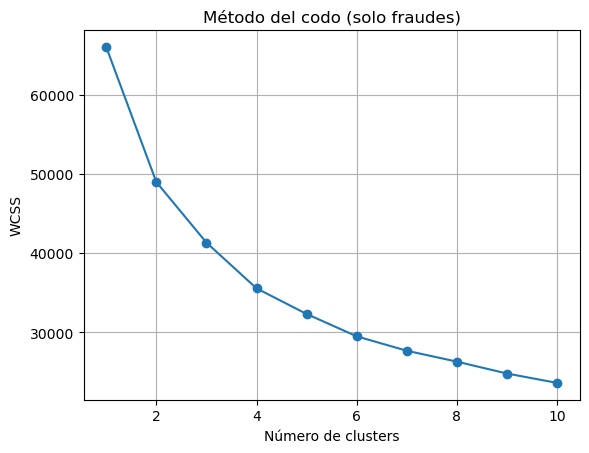

In [79]:
# Ver el número óptimo de clusters
wcss_fraudes = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_fraudes_scaled)
    wcss_fraudes.append(kmeans.inertia_)

# Mostramos el gráfico del codo
plt.plot(range(1, 11), wcss_fraudes, marker='o')
plt.title("Método del codo (solo fraudes)")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

Aplica el algoritmo k_means. Para cada conjunto de datos printea el número de registros que pertenen a dicho cluster y estadísticos de cada variable numérica. Para las variables binarias puedes graficar la cantidad de 0s y 1s por cluster.
¿Qué observas? ¿Tienen los clusters un tamaño similar? 

*Idea*: Puedes guardar la media por ejemplo de cada variable por cluster en un dataframe, de forma que tengas todos los valores agrupados y se más fácil de comparar.

In [80]:
# Aplicar k-means solo en los fraudes
kmeans_fraude = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_fraude = kmeans_fraude.fit_predict(df_fraudes_scaled)

# Añadir los clusters al dataframe original de fraudes
df_fraudes["cluster"] = clusters_fraude

print("Número de registros por cluster:")
print(df_fraudes["cluster"].value_counts())

# Calcular estadísticas por cluster (media por variable)
estadisticas_fraude = df_fraudes.groupby("cluster").mean()
print("\nMedia de cada variable por cluster:")
print(estadisticas_fraude)

Número de registros por cluster:
cluster
1    5240
2    4129
0    1642
Name: count, dtype: int64

Media de cada variable por cluster:
              PC1       PC2       PC3       PC4       PC5  fraud_bool
cluster                                                              
0        0.393248 -0.079867 -0.001622 -0.892824  1.038841         1.0
1       -0.469195 -0.043698 -0.918051  0.357443 -0.107963         1.0
2       -1.439557  2.362240 -0.170752 -0.406529 -0.166000         1.0


#### Respuesta

El orden descendente de clusters es: 1, 2, 0. Esto muestra que hay diferentes tipos de fraudes, y algunos patrones pueden ser más comunes que otros. Además, la media de fraud_bool es 1.0 en todos los clusters, lo cual es normal porque todos los registros eran fraudes.

#### k-Means sobre PCA dataset

Dado que vimos que k-Means es un algoritmo basado en distancias, dijimos que era mejor normalizar los datos. Pero también es muy beneficioso utilizar un dataset en el que hemos reducido su dimensionalidad. 
Es una práctica común aplicar PCA antes de un algoritmo de agrupamiento (como k-means) ya que  puede mejorar los resultados de la agrupación en debido a que reducce de ruido.

Utiliza el dataset del Caso Práctico Final de la asignatura de Análisis Exploratorio de Datos en el que aplicabas un PCA sobre tres componentes principales y sobre este dataset aplica k-Means.

Obtén mediante el método del codo el número de clusters idóneo. Realiza un k-means y analiza sus resultados.

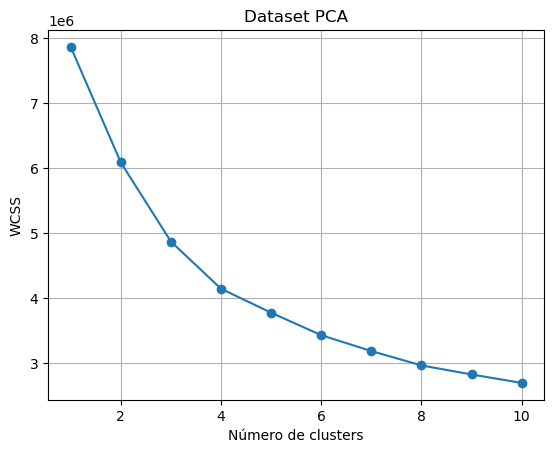

In [ ]:
df_pca_sin_target = df.drop("fraud_bool", axis=1)

wcss_pca = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_pca_sin_target)
    wcss_pca.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_pca, marker='o')
plt.title("Dataset PCA")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


#### Respuesta:

En el gráfico del codo del dataset con PCA, se observa que el punto de inflexión ocurre alrededor del cuarto cluster. A partir de ahí, la mejora en la reducción de WCSS comienza a ser menor.

Aplicar PCA antes del k-means fue útil porque redujo el ruido del dataset original, ayudando a que los grupos estén más definidos y la agrupación sea más eficiente.

Se proporciona el código para realizar una visualización en 3D.

In [84]:
df.head()

,PC1,PC2,PC3,PC4,PC5,fraud_bool,cluster
0,2.976401,3.362779,1.336025,0.142681,0.644478,0,2
1,0.968383,2.063848,0.750672,-0.013677,-1.652872,0,2
2,0.839162,0.148954,0.383372,2.088815,0.392829,0,1
3,3.088676,0.470184,-0.506475,0.375440,-0.595905,0,1
4,1.085251,0.299001,-0.195134,1.977680,-0.000466,0,1


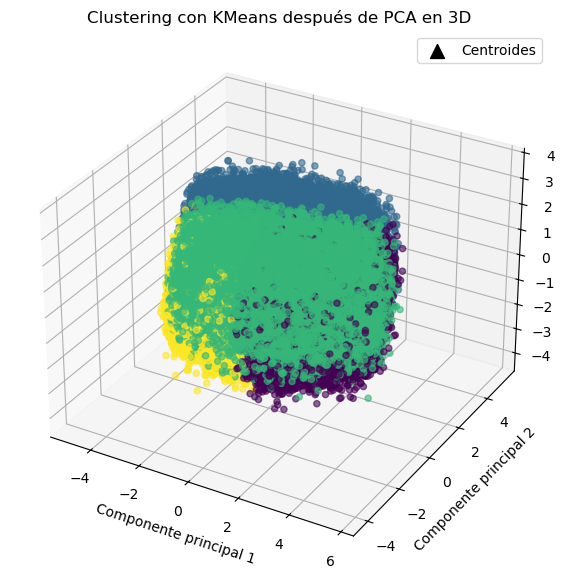

In [88]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_pca_sin_target)
df["labels"] = labels
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['labels'], cmap='viridis', alpha=0.6)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='^', s=100, color='black', label='Centroides')

ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.set_title('Clustering con KMeans después de PCA en 3D')
ax.legend()

plt.show()